In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib.ticker import FuncFormatter
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv('convertcsv.csv')
df.head()

,veiculo,midia,ano,mes,total,outros,jornalistas,manchete,fonte,link,obs
0,Editora Abril,Revista,2012,2012-01-17,4,0,4,Editora Abril demite quatro diretores de redação,Portal Comunique-se,http://portal.comunique-se.com.br/index.php/im...,NaN
1,Record,Rádio e TV,2012,2012-01-24,2,0,2,"R7 demite editores, repórteres e estagiários",Portal Comunique-se,http://portal.comunique-se.com.br/index.php/im...,Pelo menos 2 jornalistas demitidos
2,Bandeirantes,Rádio e TV,2012,2012-01-31,20,8,12,Band Rio demite jornalistas e encerra programa...,Portal Imprensa,http://www.portalimprensa.com.br/noticias/ulti...,Pelo menos 12 jornalistas demitidos
3,Bandeirantes,Rádio e TV,2012,2012-02-02,7,0,7,"Além de Luiz Ceará, outros seis são demitidos ...",Portal Imprensa,http://www.portalimprensa.com.br/noticias/bras...,NaN
4,Bandeirantes,Rádio e TV,2012,2012-02-08,17,15,2,Band acaba com a produção de dois programas e ...,Portal Comunique-se,http://portal.comunique-se.com.br/index.php/im...,Pelo menos 2 jornalistas demitidos


In [20]:
df['data'] = pd.to_datetime(df['mes'], format="%Y-%m-%d") 
df.head()

,veiculo,midia,ano,mes,total,outros,jornalistas,manchete,fonte,link,obs,data
0,Editora Abril,Revista,2012,2012-01-17,4,0,4,Editora Abril demite quatro diretores de redação,Portal Comunique-se,http://portal.comunique-se.com.br/index.php/im...,NaN,2012-01-17
1,Record,Rádio e TV,2012,2012-01-24,2,0,2,"R7 demite editores, repórteres e estagiários",Portal Comunique-se,http://portal.comunique-se.com.br/index.php/im...,Pelo menos 2 jornalistas demitidos,2012-01-24
2,Bandeirantes,Rádio e TV,2012,2012-01-31,20,8,12,Band Rio demite jornalistas e encerra programa...,Portal Imprensa,http://www.portalimprensa.com.br/noticias/ulti...,Pelo menos 12 jornalistas demitidos,2012-01-31
3,Bandeirantes,Rádio e TV,2012,2012-02-02,7,0,7,"Além de Luiz Ceará, outros seis são demitidos ...",Portal Imprensa,http://www.portalimprensa.com.br/noticias/bras...,NaN,2012-02-02
4,Bandeirantes,Rádio e TV,2012,2012-02-08,17,15,2,Band acaba com a produção de dois programas e ...,Portal Comunique-se,http://portal.comunique-se.com.br/index.php/im...,Pelo menos 2 jornalistas demitidos,2012-02-08


In [3]:
df.shape

(232, 11)

**Let's start by looking at the publications that fired the most employees since 2012.**

In [5]:
df.groupby('veiculo').total.sum().sort_values(ascending=False)

veiculo
Editora Abril            1402
Record                   1154
Infoglobo                 572
Bandeirantes              362
SBT                       315
Terra                     310
MTV                       300
Jornal A Tarde            240
Rede TV!                  235
Grupo Estado              216
TV Cultura                152
RBS                       145
Grupo Folha               138
A Tribuna                 130
Jornal da Paraíba         120
TV Gazeta                 115
Gazeta do Povo            115
Correio Braziliense       106
Diario de Pernambuco      100
TV Senado                  85
Rádio Globo/CBN            81
Editora Três (IstoÉ)       66
Ejesa                      65
TV Escola                  60
ESPN                       55
Valor Econômico            55
Rede Minas                 50
RIT TV                     50
Folha de Pernambuco        49
CNT Curitiba               48
                         ... 
Caros Amigos               11
Sistema Verdes Mares       10
AB

**Which publications fired the most jornalists?**

In [6]:
df.groupby('veiculo').jornalistas.sum().sort_values(ascending=False)

veiculo
Editora Abril            385
Infoglobo                170
Grupo Estado             112
Terra                    110
Grupo Folha              109
Bandeirantes              81
Record                    78
Ejesa                     65
Gazeta do Povo            63
Editora Três (IstoÉ)      61
Jornal A Tarde            55
RBS                       54
ESPN                      52
Valor Econômico           50
Rádio Globo/CBN           47
Rede TV!                  46
iG                        42
Hoje em Dia               40
Jornal do Commercio       39
SBT                       32
Diario de Pernambuco      30
Lance                     30
Folha de Pernambuco       29
A Tribuna                 27
TV Globo                  26
Jornal Hoje em Dia        25
Folha de Londrina         22
Editora Caras             20
Gshow                     20
Diário do Comércio        20
                        ... 
TodoDia                    5
Rede CNT                   5
Tribuna do Norte           5
Reuter

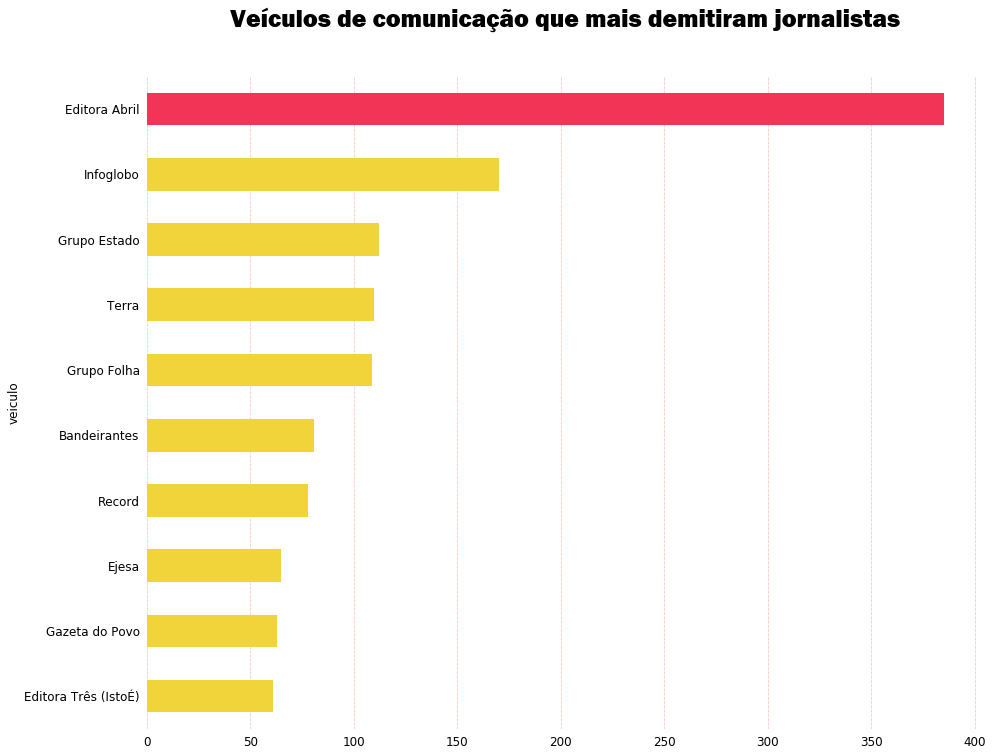

In [164]:
colors = ['#F0D43A', '#F0D43A', '#F0D43A', '#F0D43A', '#F0D43A', '#F0D43A', '#F0D43A', '#F0D43A', '#F0D43A', '#F23557']



#colors = ['#22B2DA', '#22B2DA', '#22B2DA', '#22B2DA', '#22B2DA', '#22B2DA', '#22B2DA', '#22B2DA', '#22B2DA', '#F23557']

ax = df.groupby('veiculo').jornalistas.sum().sort_values(ascending=False).head(10).sort_values(ascending=True).plot(kind='barh', color=colors, figsize=(15,12))

ax.set_title('Veículos de comunicação que mais demitiram jornalistas', pad=50)

ax.title.set_fontsize(25)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)

ax.grid(True, axis='x', color='#FEBFB3', linestyle='--', linewidth=0.8)
ax.set_axisbelow(True)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#ffffff', # colors the outside
    'axes.facecolor': '#ffffff', # colors the inside 
    'font.size': 12,
    'text.color': '#000000',
    'axes.labelcolor': '#000000',
    'legend.fancybox': True
})

plt.savefig("demissoes-veiculo.pdf")

In [77]:
df.groupby('veiculo').outros.sum().sort_values(ascending=False)

veiculo
Record                                  1076
Editora Abril                           1017
Infoglobo                                402
MTV                                      300
SBT                                      283
Bandeirantes                             281
Terra                                    200
Rede TV!                                 189
Jornal A Tarde                           185
TV Cultura                               148
Jornal da Paraíba                        120
TV Gazeta                                113
Grupo Estado                             104
A Tribuna                                103
Correio Braziliense                       94
RBS                                       91
TV Senado                                 85
Diario de Pernambuco                      70
TV Escola                                 60
Gazeta do Povo                            52
Rede Minas                                50
TV Amazonas                               40
RI

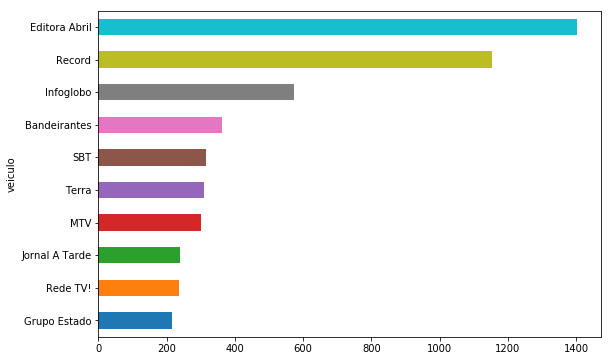

In [78]:
df.groupby('veiculo').total.sum().sort_values(ascending=False).head(10).sort_values(ascending=True).plot(kind='barh', figsize=(9,6))

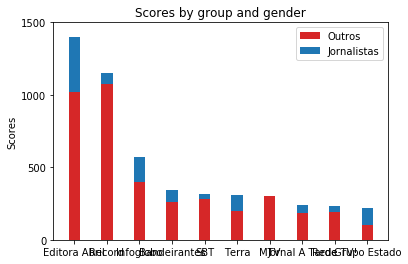

In [100]:
N = 10
outrosMeans = (1017, 1076, 402, 261, 283, 200, 300, 185, 189, 104)
jornalistasMeans = (385, 78, 170, 81, 32, 110, 0, 55, 46, 112)
#outrosStd = (1, 3, 4, 1, 12)
#jornalistasStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence


p1 = plt.bar(ind, outrosMeans, width, color='#d62728')
p2 = plt.bar(ind, jornalistasMeans, width,
             bottom=outrosMeans)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('Editora Abril', 'Record', 'Infoglobo', 'Bandeirantes', 'SBT', 'Terra', 'MTV', 'Jornal A Tarde', 'Rede TV!', 'Grupo Estado'))
plt.yticks(np.arange(0, 2000, 500))
plt.legend((p1[0], p2[0]), ('Outros', 'Jornalistas'))


plt.show()

**What kind of publications is firing the most? Can we spot a trend since 2012?**

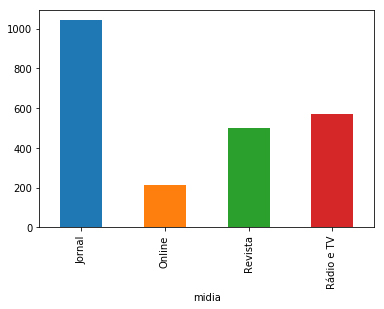

In [32]:
df.groupby('midia').jornalistas.sum().plot(kind='bar', x='ano', y='midia')

In [33]:
df.midia.value_counts()

Rádio e TV    106
Jornal         84
Revista        27
Online         15
Name: midia, dtype: int64

Jornal
Online
Revista
Rádio e TV


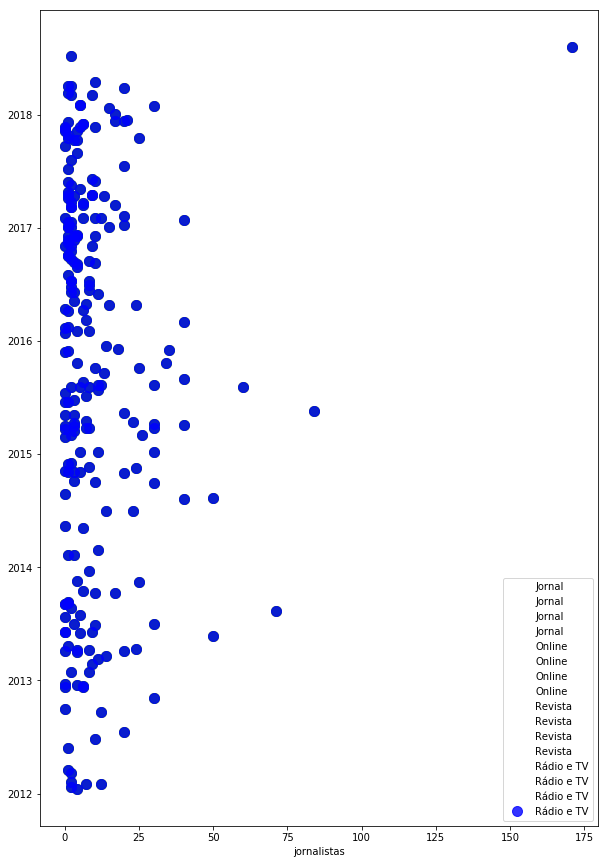

In [53]:
groups = df.groupby('midia')

colors = ['blue', 'green', 'yellow', 'violet']

fig, ax = plt.subplots()

for name, group in groups: 
    print(name)
    group
    
    groups.plot(marker='o', linestyle='', x='jornalistas', y='data', markersize=10, alpha=0.8, ax=ax, color=colors.pop(), label=name, figsize=(10,15))

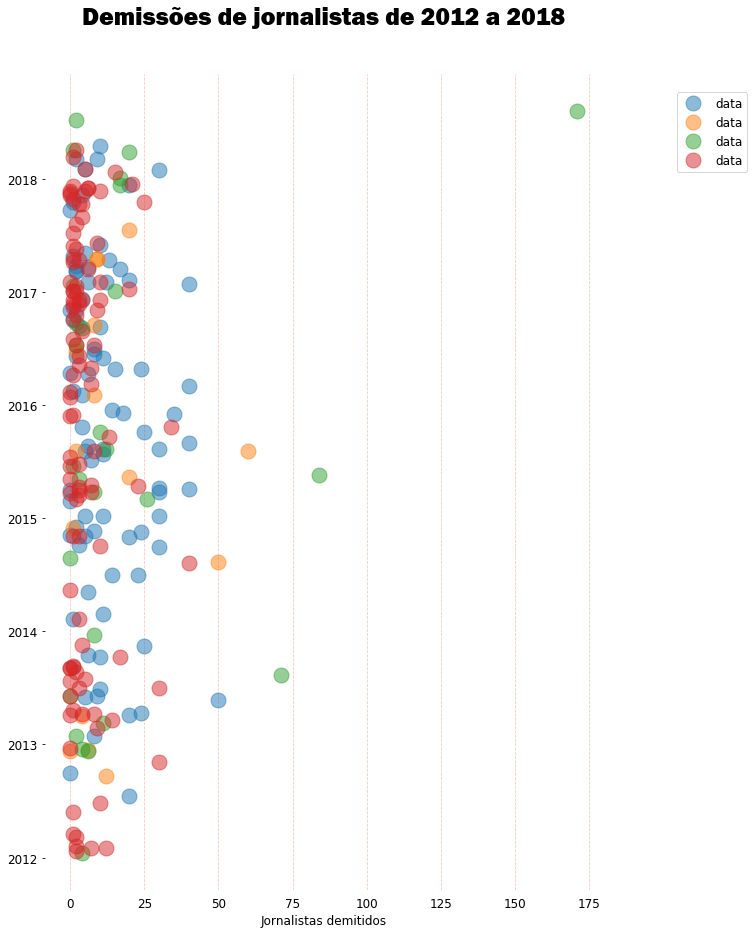

In [141]:
fig, ax = plt.subplots()

df.groupby('midia').plot(marker='o', linestyle='', x='jornalistas', y='data', markersize=15, alpha=0.5, ax=ax, figsize=(10,15))


mylabels = ['Jornal', 'Revista', 'Online', 'Rádio e TV']

ax.legend(labels=mylabels)

ax.set_title('Demissões de jornalistas de 2012 a 2018', pad=50)

ax.title.set_fontsize(25)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='both', left=True, bottom=False, grid_alpha=0.9)

ax.grid(True, axis='x', color='#febfb3', linestyle='--', linewidth=0.8)
ax.set_axisbelow(True)

ax.set_xlabel("Jornalistas demitidos")

plt.legend(bbox_to_anchor=(1.1, 1.0), loc=2, borderaxespad=1.5)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#ffffff', # colors the outside
    'axes.facecolor': '#ffffff', # colors the inside 
    'font.size': 12,
    'text.color': '#000000',
    'axes.labelcolor': '#000000',
    'legend.fancybox': True
})

plt.savefig("demissoes.pdf")

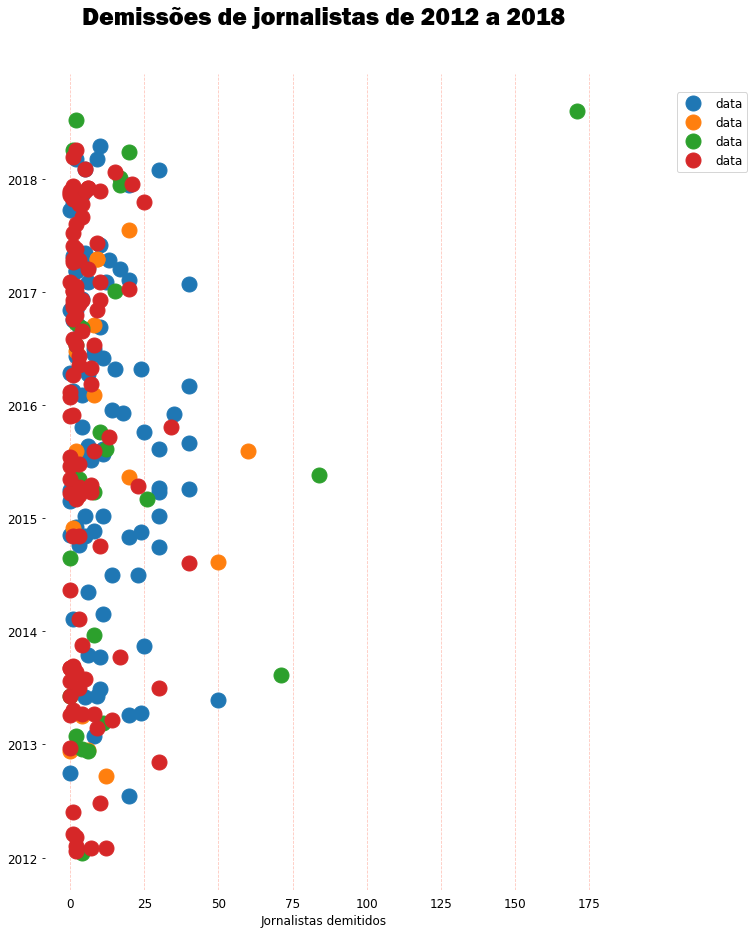

In [149]:
fig, ax = plt.subplots()

df.groupby('midia').plot(marker='o', linestyle='', x='jornalistas', y='data', markersize=15, ax=ax, figsize=(10,15))


mylabels = ['Jornal', 'Revista', 'Online', 'Rádio e TV']

ax.legend(labels=mylabels)

ax.set_title('Demissões de jornalistas de 2012 a 2018', pad=50)

ax.title.set_fontsize(25)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='both', left=True, bottom=False, grid_alpha=0.9)

ax.grid(True, axis='x', color='#febfb3', linestyle='--', linewidth=0.8)
ax.set_axisbelow(True)

ax.set_xlabel("Jornalistas demitidos")

plt.legend(bbox_to_anchor=(1.1, 1.0), loc=2, borderaxespad=1.5)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#ffffff', # colors the outside
    'axes.facecolor': '#ffffff', # colors the inside 
    'font.size': 12,
    'text.color': '#000000',
    'axes.labelcolor': '#000000',
    'legend.fancybox': True
})

plt.savefig("demissoes2.pdf")

midia
Jornal        AxesSubplot(0.125,0.125;0.775x0.755)
Online        AxesSubplot(0.125,0.125;0.775x0.755)
Revista       AxesSubplot(0.125,0.125;0.775x0.755)
Rádio e TV    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

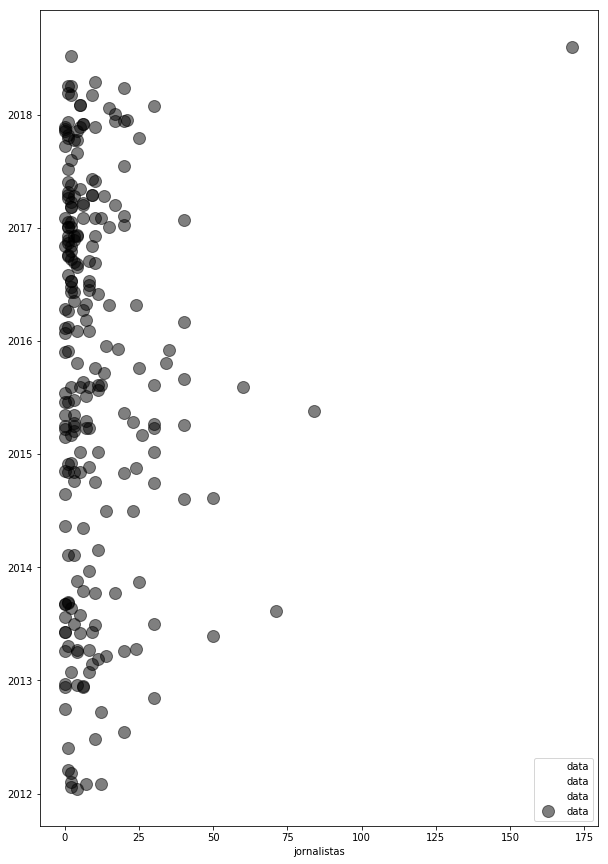

In [75]:

def get_color(midia):
    if midia == "Jornal":
        return 'red'
    elif midia == "Online":
        return 'yellow'
    elif midia == "Revista":
        return 'black'
    else:
        return 'orange'
    
dot_colors = [get_color(midia) for midia in df.midia]

fig, ax = plt.subplots()

df.groupby('midia').plot(marker='o', linestyle='', x='jornalistas', y='data', markersize=12, alpha=0.5, ax=ax, color=dot_colors, figsize=(10,15))

**In what year did the outlets fire the most jornalists?**

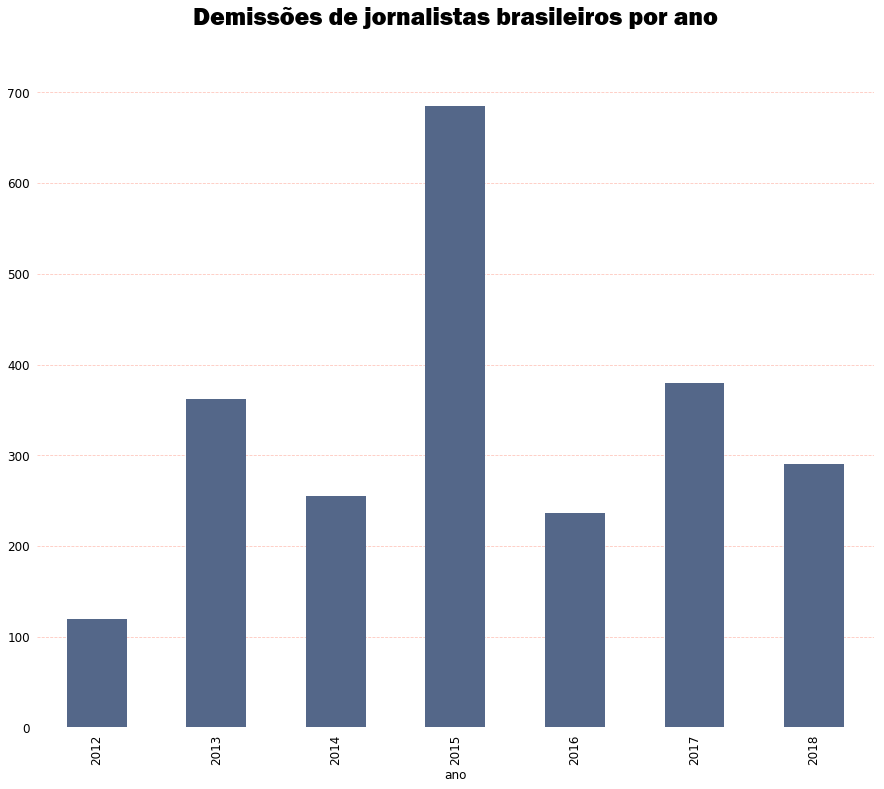

In [158]:
ax = df.groupby('ano').jornalistas.sum().plot(kind='bar', color='#546789', legend=False, figsize=(15,12))

ax.set_title('Demissões de jornalistas brasileiros por ano', pad=50)

ax.title.set_fontsize(25)
ax.title.set_fontname('Franklin Gothic Heavy')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(which='both', left=False, bottom=False, grid_alpha=0.9)

ax.grid(True, axis='y', color='#FEBFB3', linestyle='--', linewidth=0.8)
ax.set_axisbelow(True)

plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor': '#ffffff', # colors the outside
    'axes.facecolor': '#ffffff', # colors the inside 
    'font.size': 12,
    'text.color': '#000000',
    'axes.labelcolor': '#000000',
    'legend.fancybox': True
})

#plt.savefig("demissoes-ano.pdf")

In [117]:
df_jornal = df[df.midia == "Jornal"]
df_revista = df[df.midia == "Revista"]
df_online = df[df.midia == "Online"]
df_radiotv = df[df.midia == "Rádio e TV"]


In [115]:
df_jornal.groupby('ano').jornalistas.sum().sort_values(ascending=False)

ano
2015    352
2013    167
2017    161
2014    147
2016    139
2018     56
2012     20
Name: jornalistas, dtype: int64

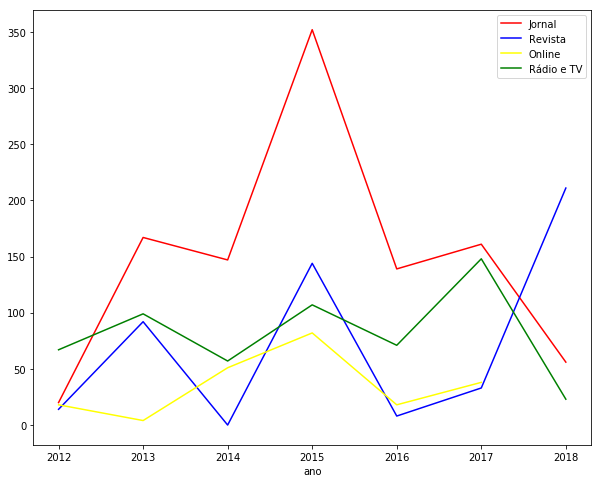

In [121]:
fig, ax = plt.subplots()

ax = df_jornal.groupby('ano').jornalistas.sum().plot(legend=True, color='red', figsize=(10,8))
df_revista.groupby('ano').jornalistas.sum().plot(ax=ax, legend=True, color='blue')
df_online.groupby('ano').jornalistas.sum().plot(ax=ax, legend=True, color='yellow')
df_radiotv.groupby('ano').jornalistas.sum().plot(ax=ax, legend=True, color='green')

mylabels = ['Jornal', 'Revista', 'Online', 'Rádio e TV']

ax.legend(labels=mylabels)

In [ ]:
b25538
c898ae